## 環境：Google colab T4 GPU

In [1]:
# Google colab
import sys
if 'google.colab' in sys.modules:
    !pip install tensorflow==2.15.0

Class label:  5
(60000, 28, 28)


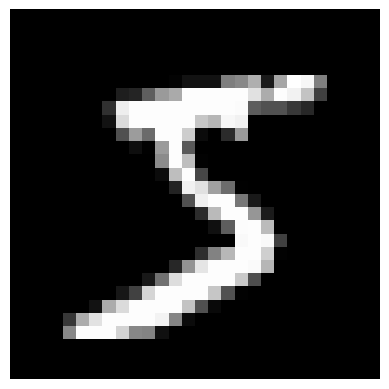

In [3]:
import os
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# シードの設定
np.random.seed(seed=0)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# データの確認
plt.imshow(x_train[0], cmap = "gray")
plt.axis('off')
print('Class label: ', y_train[0])
print(x_train.shape)

In [4]:
# カラー画像に合わせて次元を1つ増やす
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_train.shape[1], x_train.shape[2], 1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# 教師データをone-hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 画像の濃淡値を正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## ネットワークを作成



In [6]:
model = tf.keras.models.Sequential()

# Convolution 1 フィルタ32枚、各フィルタのカーネルサイズ5x5 ストライドはデフォルト (1, 1)、パディングはsame
model.add(tf.keras.layers.Conv2D(32, (5, 5), padding='same',input_shape=x_train.shape[1:]))

# Convolution 2 フィルタ64枚、各フィルタのカーネルサイズ3x3 ストライドはデフォルト (1, 1)、パディングはsame
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))

# 'relu'で活性化
model.add(tf.keras.layers.Activation('relu'))

# Max Pooling、カーネルサイズは 3x3、パディングはsame
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), padding='same'))

# 25%のユニットをドロップアウト
model.add(tf.keras.layers.Dropout(0.25))

# テンソルを一列のベクトルに平坦化
model.add(tf.keras.layers.Flatten())

# Full Connection 1 # ユニット数はベクトルサイズと同じ128
model.add(tf.keras.layers.Dense(128))

# 'relu'で活性化
model.add(tf.keras.layers.Activation('relu'))

# 30%のユニットをドロップアウト
model.add(tf.keras.layers.Dropout(0.3))

# Full Connection 2 # ユニット数はクラス数と同じ10
model.add(tf.keras.layers.Dense(num_classes))

# 最後の活性化関数は出力を確率にするためsoftmaxを使用
model.add(tf.keras.layers.Activation('softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                        

## 学習

In [8]:
batch_size = 64 # バッチサイズ
epochs = 10 # エポック数

# 分類なので交差エントロピーを用いる。
model.compile(loss='categorical_crossentropy',
              optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.0001, weight_decay=1e-6),
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 12s 8ms/step - loss: 0.4691 - accuracy: 0.8595 - val_loss: 0.1347 - val_accuracy: 0.9588
Epoch 2/10
938/938 [==============================] - 11s 11ms/step - loss: 0.1460 - accuracy: 0.9560 - val_loss: 0.0754 - val_accuracy: 0.9766
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1013 - accuracy: 0.9697 - val_loss: 0.0595 - val_accuracy: 0.9795
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0782 - accuracy: 0.9755 - val_loss: 0.0502 - val_accuracy: 0.9824
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0680 - accuracy: 0.9787 - val_loss: 0.0417 - val_accuracy: 0.9860
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0596 - accuracy: 0.9818 - val_loss: 0.0374 - val_accuracy: 0.9868
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0546 - accuracy: 0.9835 - val_loss: 0.0336 - val_accuracy: 0.9885
Epo

## acuracyの評価

In [10]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.9885
Test loss: 0.03189600631594658
Test accuracy: 0.9884999990463257


## 予測のデモ


1/1 [==============================] - 0s 17ms/step


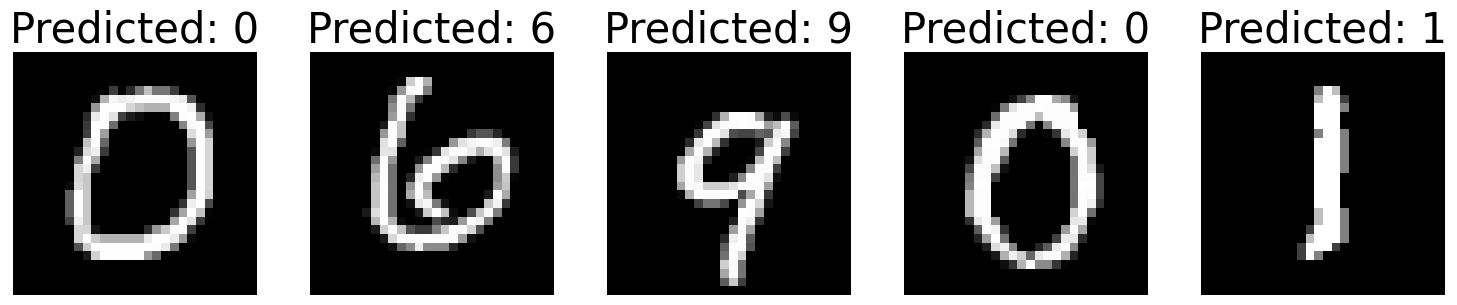

In [19]:
# 1つの図に複数の画像を表示
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # 1行5列のsubplotを作成

for i in range(5):
    ax = axes[i]
    ax.imshow(np.squeeze(x_test[10 + i]), cmap='gray', vmin=0, vmax=1)
    ax.axis('off')

    # 予測結果を重ねて表示
    target = x_test[10 + i]
    predict_prob = model.predict(np.expand_dims(target, axis=0))
    predict_class = np.argmax(predict_prob, axis=1)
    ax.set_title(f"Predicted: {predict_class[0]}", fontsize=30)  # タイトルに予測結果を表示

plt.tight_layout()  # レイアウトを調整
plt.show()

In [12]:
# モデルの保存
# save_dir = os.path.join(os.getcwd(), 'saved_models')
# model_name = 'keras_mnist_trained_model'
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)